In [2]:
library(tidyverse)
options(repr.plot.width = 8 , repr.plot.height = 5, jupyter.plot_mimetypes = "image/svg+xml") 
theme_set(theme_classic())

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.3
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# STATS 504
## Week 2
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. These records are available in aggregate form in a [public database](https://www.ssa.gov/oact/babynames/).

In [3]:
# install.packages("babynames")
library(babynames)

babynames %>% print

# A tibble: 1,924,665 × 5
    year sex   name          n   prop
   <dbl> <chr> <chr>     <int>  <dbl>
 1  1880 F     Mary       7065 0.0724
 2  1880 F     Anna       2604 0.0267
 3  1880 F     Emma       2003 0.0205
 4  1880 F     Elizabeth  1939 0.0199
 5  1880 F     Minnie     1746 0.0179
 6  1880 F     Margaret   1578 0.0162
 7  1880 F     Ida        1472 0.0151
 8  1880 F     Alice      1414 0.0145
 9  1880 F     Bertha     1320 0.0135
10  1880 F     Sarah      1288 0.0132
# ℹ 1,924,655 more rows


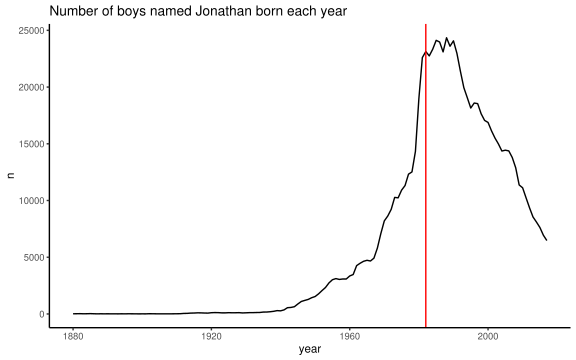

In [4]:
# Plot my name over time

<img src="https://beam-images.warnermediacdn.com/BEAM_LWM_DELIVERABLES/52dae4c7-2ab1-4bb9-ab1c-8100fd54e2f9/525e19cadd275c68e933773cc3bdad91a12fe10e.jpg?submitted=1684658977805&host=wbd-images.prod-vod.h264.io&partner=beamcom">

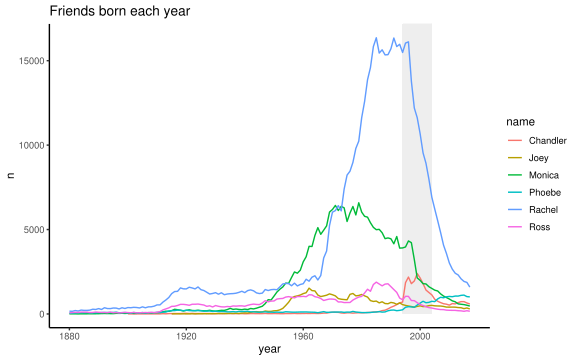

In [5]:
# friends over time

## Eternal names
The most common name each year is:

In [12]:
group_by(babynames, year, sex) %>% top_n(1) %>% print

Selecting by prop


# A tibble: 276 × 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <int>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# … with 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data. 

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name. 

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

In [6]:
# the eternal names

name,sex,n
<chr>,<chr>,<int>
Elizabeth,F,138
James,M,138
John,M,138
Joseph,M,138
William,M,138
David,M,129
Robert,M,122
Thomas,M,117
Richard,M,106


## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

In [82]:
# What fraction of male names ended in o, or female names in a, over time?

## First letter
Does the first letter of a name show evidence of trends in popularity over time?

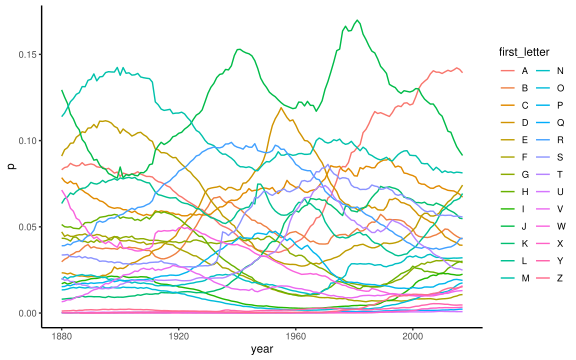

In [7]:
# first letter over time

In [91]:
# organized by decade

`summarise()` has grouped output by 'decade'. You can override using the `.groups` argument.


decade,first_letter,n
<fct>,<chr>,<int>
1880-1889,M,302499
1890-1899,M,465711
1900-1909,M,591938
1910-1919,M,1768309
1920-1929,J,2562931
1930-1939,J,2930203
1940-1949,J,4277133
1950-1959,J,4862016
1960-1969,J,4531308


## Naming diversity
Has the variety of names increased over time? How can we measure this?

- Number of unique names/year
- Inequality measure (Gini coefficient)
- Entropy

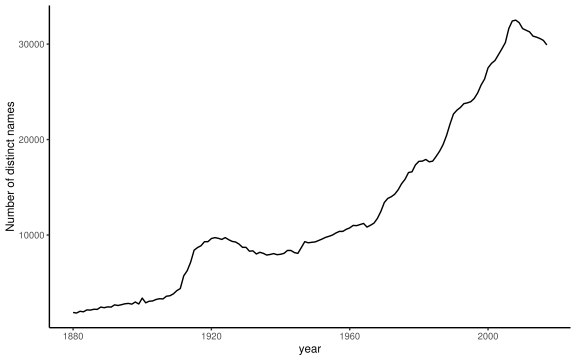

In [8]:
# distinct names over time

## Entropy
The entropy of a (discrete) probability distribution is:

$$H = -\sum_i p_i \log p_i$$

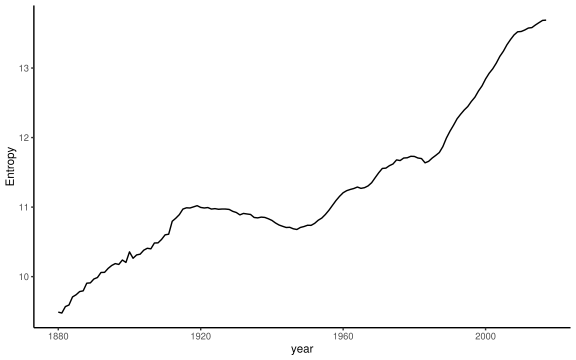

In [9]:
# entropy over time

## Gini's coefficient

Gini's coefficient is another measure of inequality in a distribution. It is defined as:

$$G = \frac{\sum_{i,j} |x_i - x_j|}{2 \bar{x} n^2}$$



Assuming $x_i\ge 0$:

- $G=0$: perfect equality.
- $G=1$: "perfect inequality": one person has everything, everyone else has nothing.
- $G \ge 0$: obvious.
- $G \le 1$: obvious?

In [163]:
gini <- function(xs) {
    n <- length(xs)
    D <- dist(xs)
    sum(dist(xs)) / n / n / mean(xs)
}

gini(c(1,1,123))

[1] 0.6506667

In [166]:
# install.packages('dineq')
library(dineq)
gini.wtd(c(1,1,123))

[1] 0.6506667

In [11]:
# gini coefficient over time

## Age vs. name
Can you accurately predict someone's age based on their name? How should we approach this question?

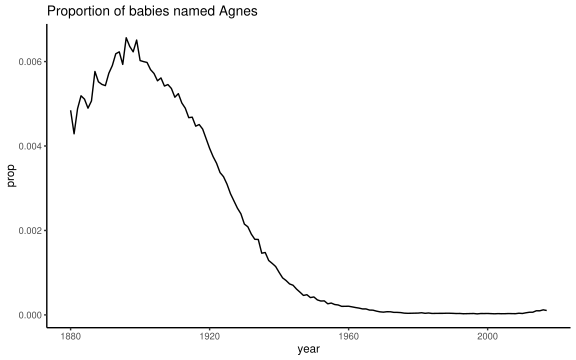

In [12]:
# proportion of babies named Agnes over time

## Bayesian model

\begin{gather}
\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})
\\=\mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\frac{\mathbb{P}(\text{birth year}=2024-a)}{\mathbb{P}(\text{name})} \\
\propto  \mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\mathbb{P}(\text{birth year}=2024-a)
\end{gather}

What are the quantities we would need to estimate?
- $\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})$:  ✅ 
- $\mathbb{P}(\text{birth year}=2024-a)$: the age distribution of the current population.

## Age distribution of the current population
- The US Census has this information [readily available](https://www.census.gov/popclock/data_tables.php?component=pyramid). 
- (I downloaded the table by hand since their website makes it hard to automate.)

In [50]:
read_csv('United States Population by Age and Sex.csv', skip=1) %>% 
    mutate(across(1:3, \(x) str_replace_all(x, "[^\\d.]", "") %>% as.numeric)) %>% 
    slice(1:101) -> ages

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 307 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Age, Male % of Population, Female % of Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


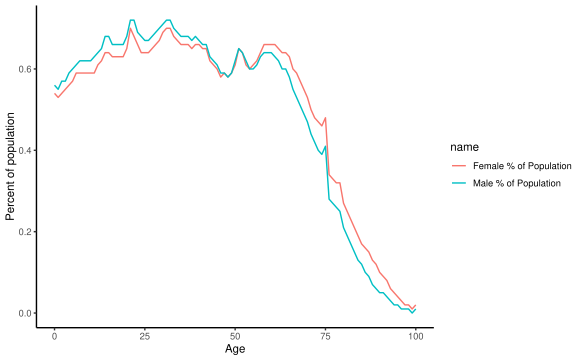

In [92]:
ages %>% 
    pivot_longer(cols=2:3, values_to = "Percent of population") %>%
    ggplot(aes(x=Age, y=`Percent of population`, color=name)) +
    geom_line()


## Putting it together

Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


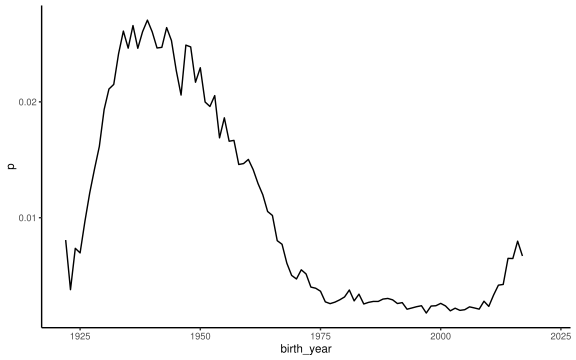

In [106]:
ages %>% mutate(birth_year = 2022 - Age) %>% 
    select(c(1, 3, 4)) %>% 
    left_join(filter(babynames, name == "Agnes", sex == "F"), 
               by=c("birth_year" = "year")) %>% 
    mutate(p = prop * `Female % of Population`, p = p / sum(p, na.rm = T)) %>% 
    ggplot(aes(x = birth_year, y=p)) + geom_line()

## Name distribution of the current population
- Let's say we didn't know Bayesian statistics that well, and we decided to estimate $\mathbb{P}(\text{name})$. How might we do it?
- $\mathbb{P}(\text{name})$: the probability that a randomly sampled person from the current population has this name.
- How to estimate this? What sort of data?

\begin{gather}
\mathbb{P}(\text{name})	=\sum_{y}\mathbb{P}(\text{name},\text{survives},\text{birth year}=y)
\\=\sum_{y}\mathbb{P}(\text{survives}\mid\text{birth year}=y)\mathbb{P}(\text{name },\text{birth year}=y)
\end{gather}

How to estimate $$\mathbb{P}(\text{name },\text{birth year}=y)?$$

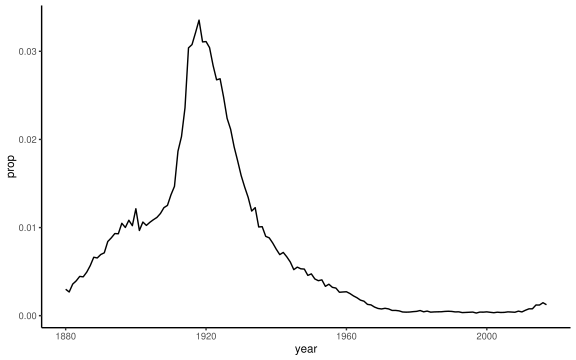

In [64]:
babynames %>% filter(name == "Agnes", sex == "F") %>% 
    mutate(prop = n / sum(n)) %>% 
    ggplot(aes(x=year, y=prop)) + geom_line()

## Other options
- Supervised learning: build a prediction function $f(\text{name})$.
    - What sort of data would be needed?
    - What sort of prediction function $f$?


## Life expectancy at birth
- Finally we want to estimate $\mathbb{P}(\text{survives}\mid\text{birth year}=y)$. 
- Hard(er) to estimate! We will look at the related quantity: $\mathbb{E}(\text{lifespan} \mid \text{birth year}=y)$.
- This is called [*life expectancy at birth*](https://www.statista.com/statistics/1040079/life-expectancy-united-states-all-time/#:~:text=Over%20the%20past%20160%20years,to%2078.9%20years%20in%202020).

In [74]:
src_url <- "https://docs.google.com/spreadsheet/pub?key=tiAiXcrneZrUnnJ9dBU-PAw&output=xlsx"
download.file(src_url, "life_expectancy.xlsx") 

In [81]:
readxl::read_excel("life_expectancy.xlsx") %>% 
    filter(`Life expectancy with projections` == "United States") %>% 
    pivot_longer(cols=-1, names_to="year", values_to="lifeexp") %>% 
    mutate(across(2:3, as.numeric)) %>% 
    drop_na -> us_le

Warning message:
“Removed 103 rows containing missing values (`geom_line()`).”


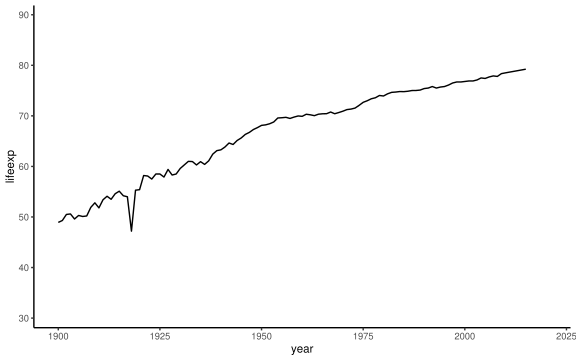

In [84]:
ggplot(us_le, aes(x=year, y=lifeexp)) + geom_line() + xlim(c(1900, 2020))

Now we are going to make a drastic assumption: everyone's life span is exactly given by their life expectancy at birth. Then, 

$$\mathbb{P}(\text{survives} \mid \text{birth year}=y) = \mathbb{1}(\text{life expectancy}_y > 2024 - y)$$

Warning message:
“Removed 102 rows containing missing values (`geom_line()`).”


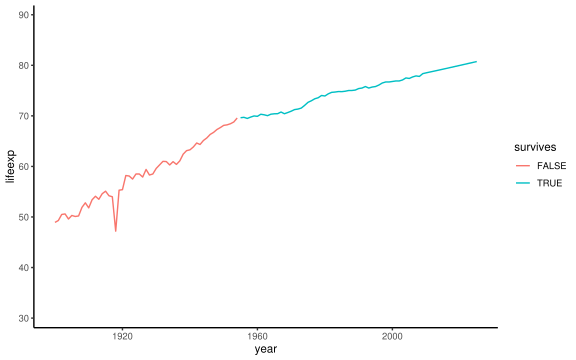

In [89]:
us_le %>% mutate(survives = lifeexp > 2024 - year) %>% 
    ggplot(aes(x=year, y=lifeexp, color=survives)) + geom_line() + xlim(c(1900, 2025))